<a href="https://colab.research.google.com/github/yurimses/cnn_learning/blob/main/CNN_PT_2_(Xception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Networks**:
Código adaptado da vídeo aula do Prof. Rafael Rossi (https://youtu.be/HV9cB6UKLIs?si=A4Q_bQMDjMgNS-5b)

# Importações

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criando um gerador de imagens

In [26]:
dir_treino = '/content/drive/MyDrive/Datasets/cats_and_dogs/train'
dir_teste = '/content/drive/MyDrive/Datasets/cats_and_dogs/test'

In [27]:
data_generator = ImageDataGenerator(rescale = 1/255.0)

In [28]:
gerador_treino = data_generator.flow_from_directory(dir_treino, batch_size = 32, target_size = (224, 224), class_mode = 'sparse')

Found 8005 images belonging to 2 classes.


In [29]:
gerador_teste = data_generator.flow_from_directory(dir_treino, batch_size = 32, target_size = (224, 224), class_mode = 'sparse')

Found 8005 images belonging to 2 classes.


In [30]:
# Retornar conteúdo que está dentro do batch 0
gerador_treino[0]

(array([[[[0.31764707, 0.32941177, 0.34901962],
          [0.30980393, 0.32156864, 0.34117648],
          [0.29803923, 0.30980393, 0.32941177],
          ...,
          [0.44705886, 0.4431373 , 0.32156864],
          [0.43529415, 0.43137258, 0.30980393],
          [0.46274513, 0.45882356, 0.3372549 ]],
 
         [[0.29411766, 0.30588236, 0.3254902 ],
          [0.2901961 , 0.3019608 , 0.32156864],
          [0.2901961 , 0.3019608 , 0.32156864],
          ...,
          [0.43921572, 0.43529415, 0.3137255 ],
          [0.4431373 , 0.43921572, 0.31764707],
          [0.44705886, 0.4431373 , 0.32156864]],
 
         [[0.29411766, 0.30588236, 0.3254902 ],
          [0.30980393, 0.32156864, 0.34117648],
          [0.3137255 , 0.3254902 , 0.34509805],
          ...,
          [0.4431373 , 0.43921572, 0.31764707],
          [0.46274513, 0.45882356, 0.3372549 ],
          [0.43921572, 0.43529415, 0.3137255 ]],
 
         ...,
 
         [[0.77647066, 0.7960785 , 0.8196079 ],
          [0.80784

In [31]:
len(gerador_treino)

251

In [32]:
# Ou seja, 63 lotes por 32 imagens
# Último lote ficará com menos imagens
63*32

2016

In [33]:
# Retorna 2 elementos
# O primeiro é o array de imagens
# O segundo elemento é o array das classes
len(gerador_treino[0])

2

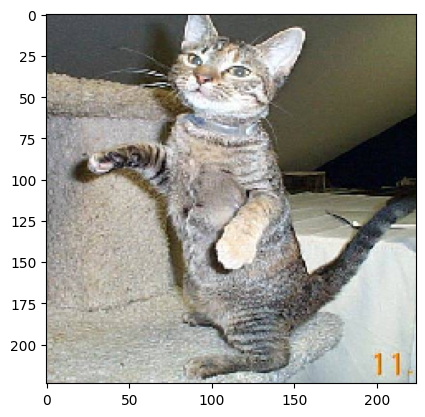

In [34]:
# batch 0 > imagens > primeira imagem
plt.imshow(gerador_treino[0][0][0])

# Obtendo um modelo de Rede Neural (Xception)

In [35]:
# O problema que está sendo trabalhado não tem 1000 categorias (arquitetura padrão Xception), ele tem 2
# Com include_top = False entra tudo de convolução, mas não a parte do Flattening e camada densa
# Isso foi feito para customizar a arquitetura de acordo com o problema
model = tf.keras.applications.Xception(input_shape = (244, 244, 3), include_top = False)

In [36]:
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(model.output)

In [37]:
hidden = tf.keras.layers.Dense(2048, activation = 'relu')(average_pooling)

In [38]:
pred = tf.keras.layers.Dense(1, activation = 'sigmoid')(hidden)

In [39]:
model_final = tf.keras.models.Model(inputs = model.input, outputs = pred)

# Sumário do modelo

In [40]:
model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 121, 121, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 121, 121, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 121, 121, 32)         0         ['block1_conv1_bn[0][0]'

# Compilando o modelo

In [41]:
model_final.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Treinando o modelo

In [ ]:
model_final.fit(gerador_treino, epochs = 10)

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7f1bf4759900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


  1/251 [..............................] - ETA: 8:35:56 - loss: 0.6777 - accuracy: 0.6562